### Анализируем занятое пространство на Диске С

In [1]:
%pwd

'D:\\PycharmProjects\\explore_filesystem'

In [2]:
import file_size
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

path = "C:/Program Files/"
items = file_size.explore_dir(path)
# pprint(items)

N = len(items[path])
print("Total:", N, "\n")
file_size.pretty_print_info(items[path])


Searching for  C_Program Files_ ...

Everything is up to date
Total: 88 

CMake.lnk                 lnk     1.080  Kib
desktop.ini               ini     0.169  Kib
IntelliJ IDEA 2019.2.4    4       1.320  Mib
Microsoft Visual Studi    0       4.736  Kib
Microsoft.NET             net     678.1  Kib
PyCharm 2019.2            2       951.0  Mib
Python3.8.1               1       159.0  Mib
STM32CubeIDE_1.3.0        0       2.118  Gib
TrueSTUDIO for STM32 9    0       2.028  Gib
Ultimaker Cura 4.4        4       556.1  Mib
--------------------------------------------
Application Verifier      dir     346.4  Kib
Bonjour                   dir     599.5  Kib
boost_1_71_0              dir     2.332  Gib
Borderlands 2 Remaster    dir     26.65  Gib
CMake                     dir     79.28  Mib
Common Files              dir     315.6  Mib
Corel                     dir     24.08  Mib
CorelDRAW Graphics Sui    dir     1.576  Gib
CPUID                     dir     4.271  Mib
DAEMON Tools Pro          

#### Извлечём элементы больше Гигибайта

Сначала свормируем список имён, затем с его помощью - список кортежей

In [3]:
# больше гигабайта только
sorted_names = sorted(items[path], key= lambda x: items[path].get(x),  reverse=True)
#pprint(sorted_names)

more_than_1Gig = [(k, int(items[path][k][0])) for k in sorted_names if int(items[path][k][0]) > 1024*1024*1024]
K = len(more_than_1Gig)
print("Всего таких", K, "элемент(a/ов)\n")

pprint(more_than_1Gig)

Всего таких 24 элемент(a/ов)

[('Hitman', 70419784175),
 ('The Witcher 3 - Wild Hunt', 43089505318),
 ('Borderlands 2 Remastered', 28623938987),
 ('SOLIDWORKS 2019', 20735810290),
 ('opencv-4-1-1', 14032945535),
 ('MATLAB R2017b', 13975985888),
 ('opencv-3-4-9', 9941731097),
 ('eigen-3-3-7', 8263895867),
 ('Journey to the Savage Planet Hot Garbage', 5875684779),
 ('KiCad', 5730529227),
 ('Docker', 3586518205),
 ('GRIS', 3494423083),
 ('KOMPAS-3D v18', 3370799247),
 ('NVIDIA GPU Computing Toolkit', 3022259930),
 ('Microsoft Office', 2818981461),
 ('boost_1_71_0', 2504431056),
 ('STM32CubeIDE_1.3.0', 2274315797),
 ('Unity', 2223561715),
 ('TrueSTUDIO for STM32 9.3.0', 2178219242),
 ('CorelDRAW Graphics Suite 2020', 1692920254),
 ('NVIDIA Corporation', 1489736804),
 ('GIMP 2', 1173335475),
 ('opencv-3-4-6', 1159733118),
 ('MySQL', 1135102554)]


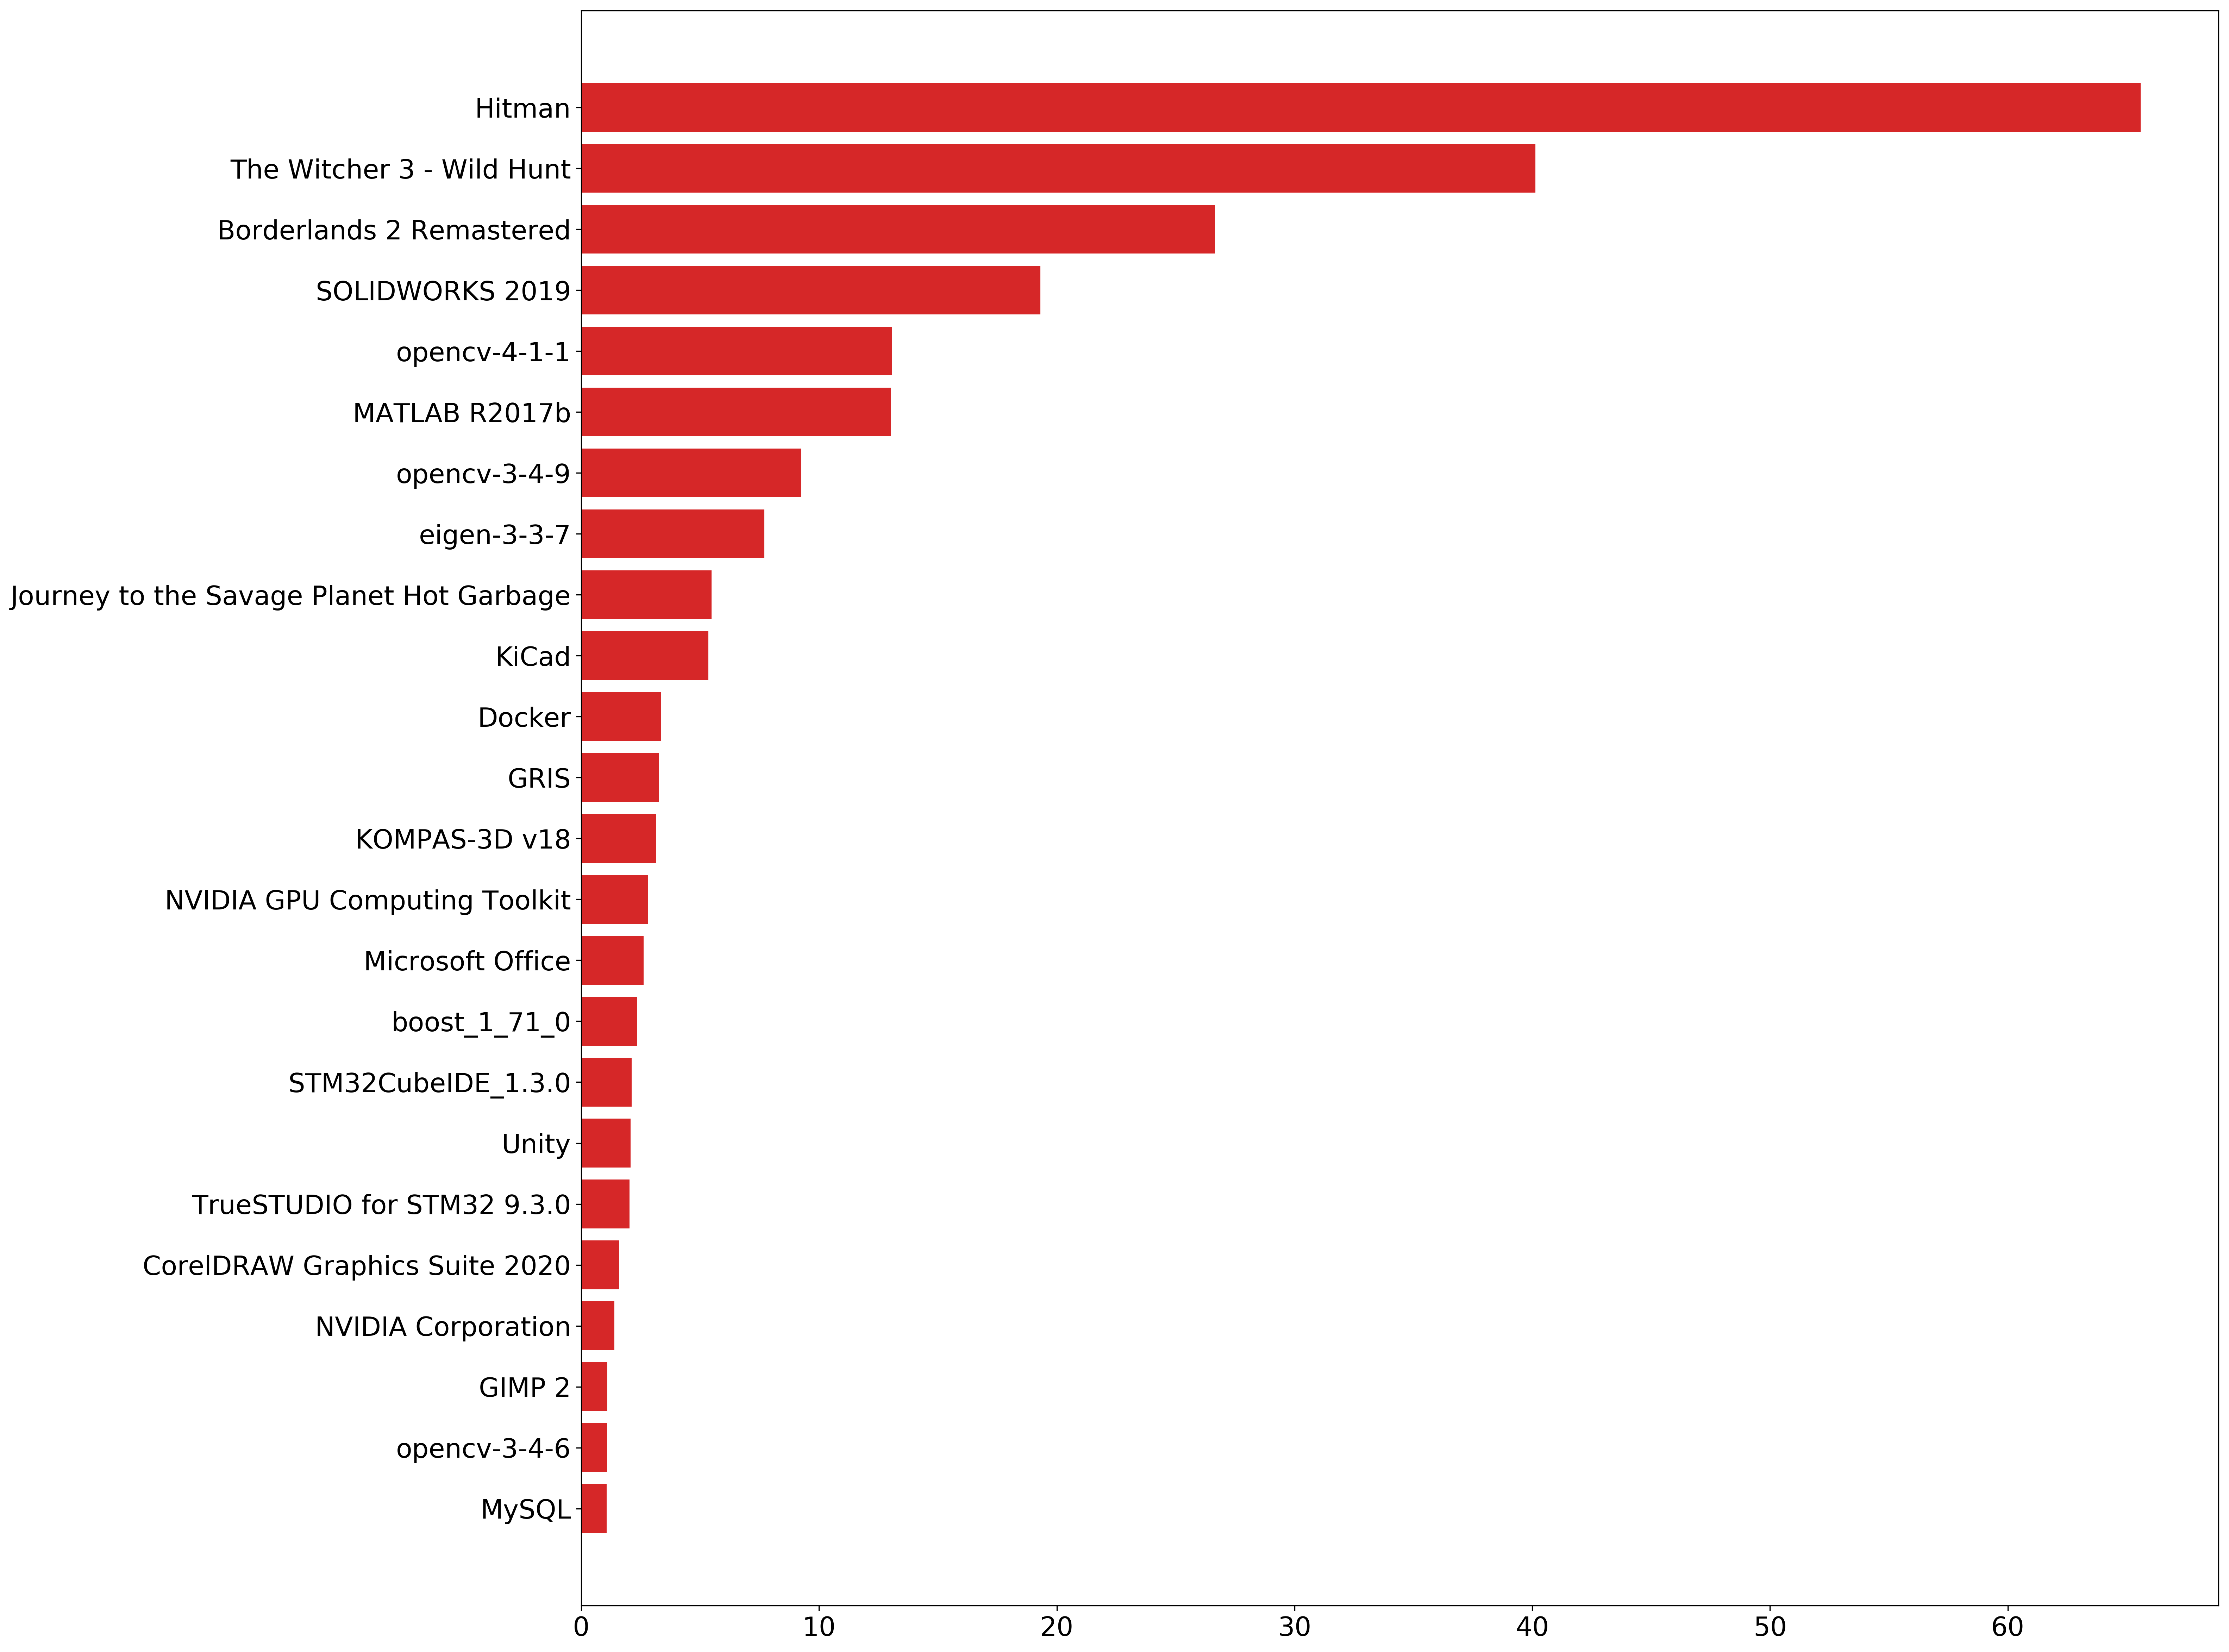

In [4]:
keys = [x[0] for x in more_than_1Gig[::-1]]
sizes = [x[1]/(1024*1024*1024) for x in more_than_1Gig[::-1]]
y_pos = np.arange(K)
colors = np.random.rand(N)

#print(y_pos)
#print(sizes)
#print(len(y_pos), len(sizes), len(items[path].keys()))

mpl.rcParams['font.size'] = 18.0
plt.figure(figsize=(20,20), dpi = 300)

plt.barh(y_pos, sizes, color='C3')
plt.yticks(y_pos, keys)
plt.show()

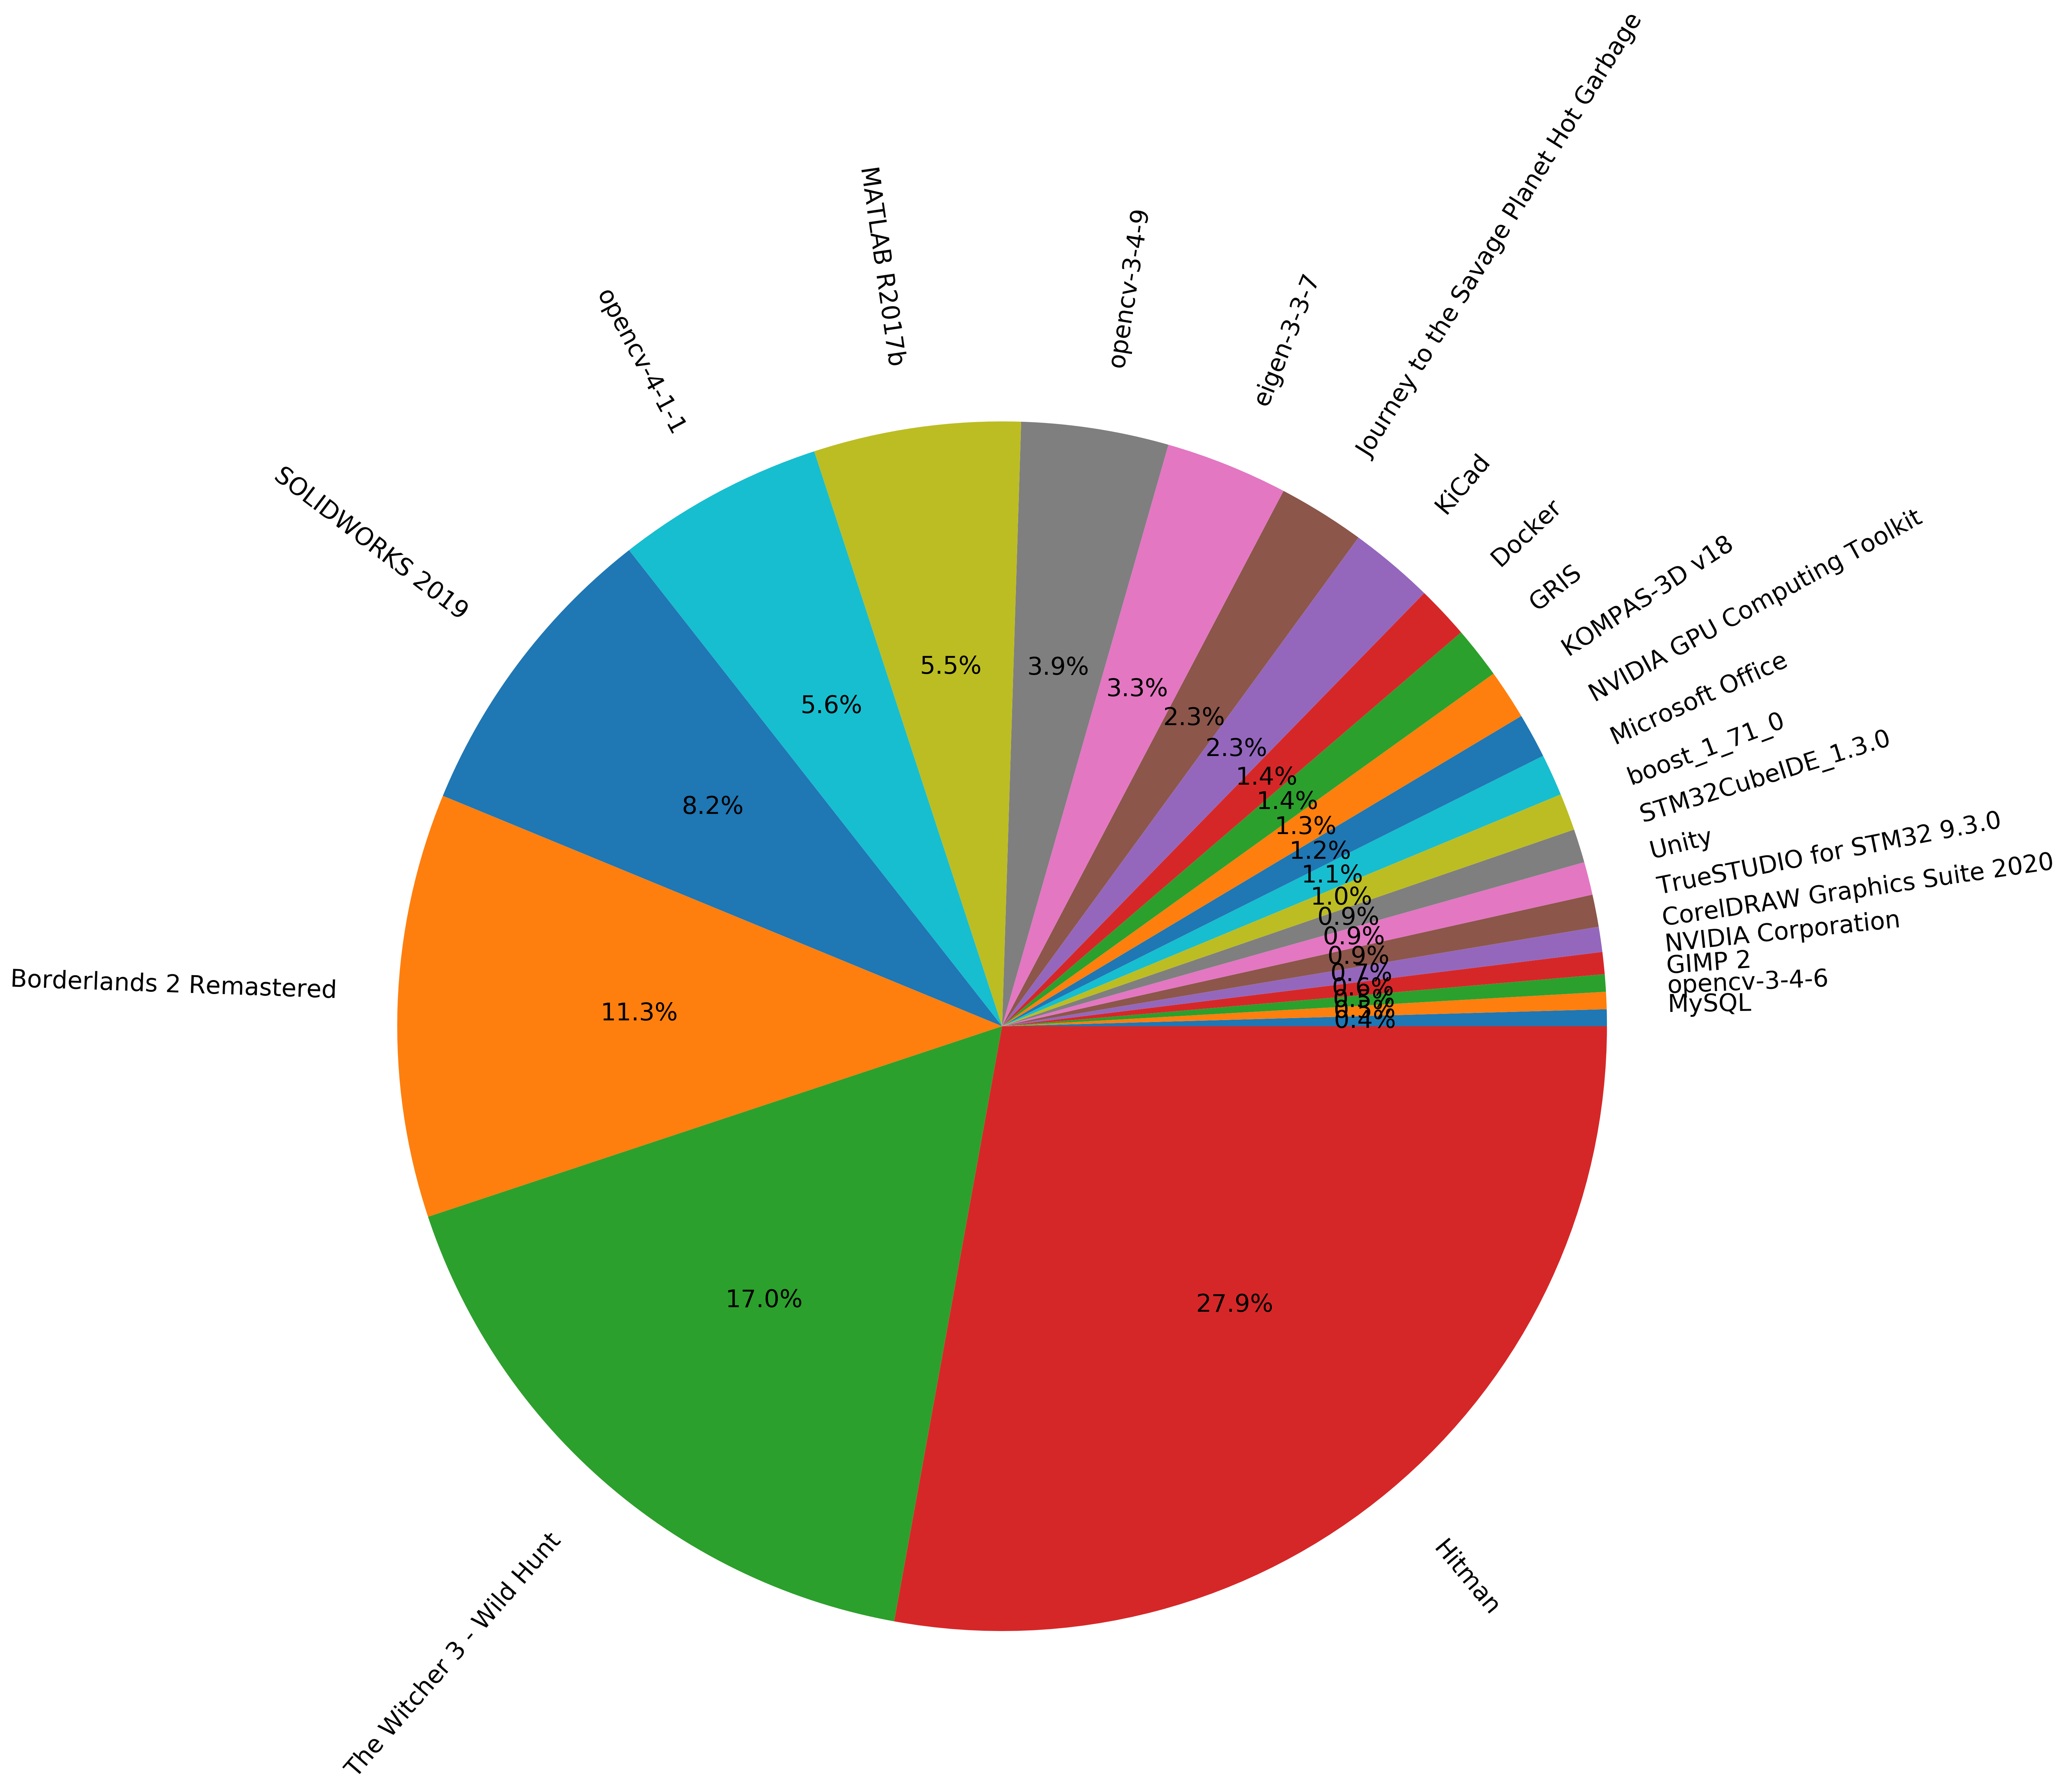

In [7]:
plt.figure(figsize=(20,30), dpi = 300)

plt.pie(sizes, labels = keys, labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()

### Теперь исследуем "C:/Program Files (x86)/"

In [8]:
path2 = "C:/Program Files (x86)/"
items2 = file_size.explore_dir(path2)
# pprint(items)


file_size.pretty_print_info(items2[path2])

Searching for  C_Program Files (x86)_ ...

Everything is up to date
desktop.ini               ini     0.169  Kib
Microsoft.NET             net     8.568  Mib
--------------------------------------------
Adobe                     dir     177.6  Mib
Advanced IP Scanner       dir     35.35  Mib
Application Verifier      dir     295.7  Kib
Arduino                   dir     453.5  Mib
Bonjour                   dir     616.3  Kib
Common Files              dir     491.8  Mib
Corel                     dir     18.47  Mib
DeviceManager             dir     10.11  Mib
DVDVideoSoft              dir     10.52  Mib
Epic Games                dir     831.2  Mib
Far Cry 3                 dir     11.05  Gib
FastStone Capture         dir     10.06  Mib
FlashLoader               dir     83.83  Mib
Foxit Software            dir     698.6  Mib
GPU-Z                     dir     6.249  Mib
gs                        dir     23.73  Mib
InstallShield Installa    dir     225.4  Kib
Internet Explorer         dir   

In [20]:
# Больше 64 Мб

# most_significant = {k:v[0] for k,v in items2[path2].items() if int(v[0]) > 64*1024*1024}

keys2 = sorted(items2[path2], key=items2[path2].get, reverse=True)
pprint(keys2)

keys_more = [k for k in keys2 if int(items2[path2][k][0]) > 64*1024*1024]
pprint(keys_more)

sizes_more = [int(items2[path2][k][0])/(1024*1024) for k in keys_more]

['Far Cry 3',
 'Microsoft Visual Studio',
 'Windows Kits',
 'NVIDIA Corporation',
 'Proteus 8 Professional',
 'Epic Games',
 'Foxit Software',
 'Common Files',
 'Arduino',
 'VMware Player',
 'Reference Assemblies',
 'Microsoft',
 'Adobe',
 'MySQL',
 'Sony',
 'FlashLoader',
 'MSI Afterburner',
 'Telegram Desktop',
 'RivaTuner Statistics Server',
 'Microsoft SQL Server',
 'STM32 ST-LINK Utility',
 'Logitech',
 'Advanced IP Scanner',
 'Microsoft SDKs',
 'ONVIF Device Manager',
 'Open Design Alliance',
 'Windows Sidebar',
 'gs',
 'Corel',
 'StartIsBack',
 'DVDVideoSoft',
 'DeviceManager',
 'FastStone Capture',
 'Microsoft.NET',
 'windows nt',
 'GPU-Z',
 'Windows Photo Viewer',
 'Windows Media Player',
 'WindowsPowerShell',
 'STMicroelectronics',
 'Windows Defender',
 'MSBuild',
 'Internet Explorer',
 'Microsoft Visual Studio Tools for Unity',
 'Bonjour',
 'Windows Mail',
 'Mozilla Maintenance Service',
 'Application Verifier',
 'InstallShield Installation Information',
 'UltraUXThemePatche

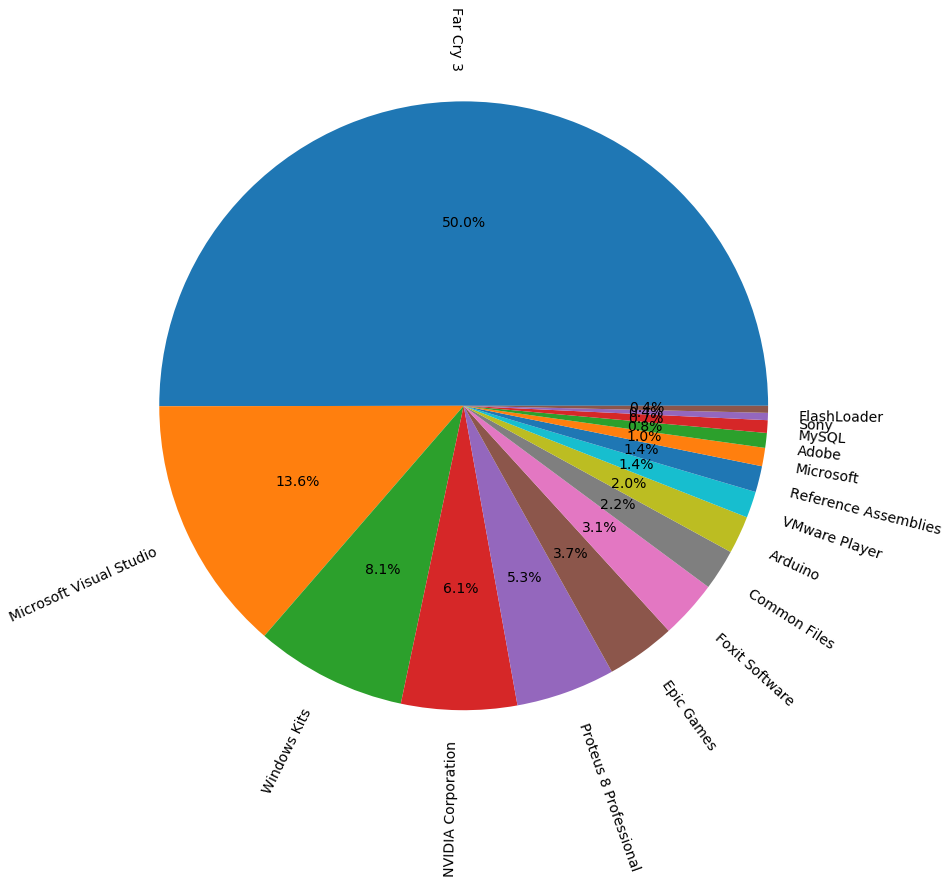

In [22]:
mpl.rcParams['font.size'] = 14.0
plt.figure(figsize=(14,14))
plt.pie(sizes_more, labels = keys_more, labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
#plt.pie(items.values(), labels = items.keys(), labeldistance = 1.1, rotatelabels = True, autopct='%1.1f%%')
plt.show()